In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import json

In [3]:
# json 파일 가져오기
json_data_path = './data/blackpink.json'
with open(json_data_path, 'r', encoding = 'utf-8') as f:
    json_data = json.load(f)
    
print("json_data type", type(json_data))
print('***')
print(json_data)

json_data type <class 'dict'>
***
{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'rose', 'supercategory': ''}, {'id': 2, 'name': 'lisa', 'supercategory': ''}, {'id': 3, 'name': 'jisoo', 'supercategory': ''}, {'id': 4, 'name': 'jennie', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 853, 'file_name': 'blackpink.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': [], 'area': 53072.651399999995, 'bbox': [39.0, 285.7, 177.37, 299.22], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 2, 'image_id': 1, 'category_id': 4, 'segmentation': [], 'area': 44783.967000000004, 'bbox': [312.5, 316.84, 167.9, 266.73], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 3, 'image_id': 1, 'category_id':

In [5]:
# json 값을 가져와서 체크해보기
print(json_data['categories'])
print(json_data['images'])
print(json_data['annotations'])

[{'id': 1, 'name': 'rose', 'supercategory': ''}, {'id': 2, 'name': 'lisa', 'supercategory': ''}, {'id': 3, 'name': 'jisoo', 'supercategory': ''}, {'id': 4, 'name': 'jennie', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 853, 'file_name': 'blackpink.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': [], 'area': 53072.651399999995, 'bbox': [39.0, 285.7, 177.37, 299.22], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 2, 'image_id': 1, 'category_id': 4, 'segmentation': [], 'area': 44783.967000000004, 'bbox': [312.5, 316.84, 167.9, 266.73], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 3, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 29861.175599999995, 'bbox': [205.54, 277.57, 123.21, 242.36], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 4, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area'

In [18]:
# 변수선언
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

print(categories_info, images_info, annotations_info)
print(images_info)

# 라벨 딕셔너리 선언
label_dict = {1: 'rose', 2:'lisa', 3:'jisoo', 4:'jennie'}

[{'id': 1, 'name': 'rose', 'supercategory': ''}, {'id': 2, 'name': 'lisa', 'supercategory': ''}, {'id': 3, 'name': 'jisoo', 'supercategory': ''}, {'id': 4, 'name': 'jennie', 'supercategory': ''}] [{'id': 1, 'width': 640, 'height': 853, 'file_name': 'blackpink.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}] [{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': [], 'area': 53072.651399999995, 'bbox': [39.0, 285.7, 177.37, 299.22], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 2, 'image_id': 1, 'category_id': 4, 'segmentation': [], 'area': 44783.967000000004, 'bbox': [312.5, 316.84, 167.9, 266.73], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 3, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 29861.175599999995, 'bbox': [205.54, 277.57, 123.21, 242.36], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}, {'id': 4, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area'

In [ ]:
"""
[{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': [], 'area': 53072.651399999995,
'bbox': [39.0, 285.7, 177.37, 299.22], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}},
{'id': 2, 'image_id': 1, 'category_id': 4, 'segmentation': [], 'area': 44783.967000000004,
'bbox': [312.5, 316.84, 167.9, 266.73], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}},
{'id': 3, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 29861.175599999995,
'bbox': [205.54, 277.57, 123.21, 242.36], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}},
{'id': 4, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 33393.83200000001,
'bbox': [426.24, 292.46, 178.72, 186.85], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}]
"""

{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': [], 'area': 53072.651399999995, 'bbox': [39.0, 285.7, 177.37, 299.22], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
[39.0, 285.7, 177.37, 299.22]
bbox 좌표 확인 >>  39 285 177 299
3
jisoo
{'id': 2, 'image_id': 1, 'category_id': 4, 'segmentation': [], 'area': 44783.967000000004, 'bbox': [312.5, 316.84, 167.9, 266.73], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
[312.5, 316.84, 167.9, 266.73]
bbox 좌표 확인 >>  312 316 167 266
4
jennie
{'id': 3, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 29861.175599999995, 'bbox': [205.54, 277.57, 123.21, 242.36], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
[205.54, 277.57, 123.21, 242.36]
bbox 좌표 확인 >>  205 277 123 242
1
rose
{'id': 4, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 33393.83200000001, 'bbox': [426.24, 292.46, 178.72, 186.85], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}


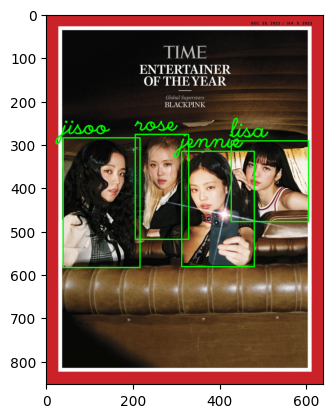

In [19]:
for image_json in images_info:
    file_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    image_id = image_json['id']
    
    image_path = os.path.join('./data/', file_name)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for anno_json in annotations_info:
        print(anno_json)
        if image_id == anno_json['image_id']:
            bbox = anno_json['bbox']
            print(bbox)
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print("bbox 좌표 확인 >> ", x, y, w, h)
            
            # 박스 그리기
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # 라벨 표시
            category_id = anno_json['category_id']
            print(category_id)
            
            label_name = label_dict[category_id]
            print(label_name)
            image = cv2.putText(image, label_name, (x, y - 10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)
            
            
    plt.imshow(image)
    plt.show()

In [20]:
from xml.etree.ElementTree import parse

In [ ]:
def xml_read(xml_path):
    root = parse(xml_path).getroot()
    
    image_info = root.findall('image')
    
    for image in image_info:
        bbox = image.findall('box')
        
        image_width = image.attrib['width']
        image_height = image.attrib['height']
        
        image_name = image.attrib['name']
        image_name = os.path.join('./', image_name)
        
        image = 